Solucion planteada en Python

In [34]:
import pandas as pd

In [35]:
# Cargamos el archivo CSV para nuestro DataFrame
df = pd.read_csv('at_health_facilities.csv')

In [36]:
df.head()

,iso3,year,age 15-17,age 20-34
0,AFG,2010,33,29
1,ALB,2005,98,96
2,ALB,2008,98,98
3,ARG,2012,100,100
4,ARM,2000,93,87


In [37]:
# 1. Cuántos países reportaron los datos?
num_countries = df['iso3'].nunique()
print(f"Un total de {num_countries} países reportaron los datos.")

Un total de 100 países reportaron los datos.


In [38]:
# 2. Cuál es la diferencia entre el año mínimo y año máximo con datos válidos por cada país?
year_range = df.groupby('iso3')['year'].agg(['min', 'max'])
year_diff = year_range['max'] - year_range['min']
print("Diferencia de años entre el año \nmínimo y año máximo por cada pais:")
print(year_diff)

Diferencia de años entre el año 
mínimo y año máximo por cada pais:
iso3
AFG     0
ALB     3
ARG     0
ARM    10
AZE     0
       ..
VNM    11
VUT     0
YEM     7
ZMB    12
ZWE     9
Length: 100, dtype: int64


In [39]:
# 3. Cuántos países reportaron datos en 3 años o más?
countries = df.groupby('iso3')['year'].nunique()
num_countries = len(countries[countries >= 3])
print(f"Un total de {num_countries} países reportaron datos en 3 años o más.")

Un total de 34 países reportaron datos en 3 años o más.


In [40]:

# 4. Qué países reportaron el 100% de incidencia para al menos un año en cualquier grupo de edad?
countries_incidence = df[(df['age 15-17'] == 100) | (df['age 20-34'] == 100)]['iso3'].unique()
print(f"Los países que reportaron el 100% de incidencia en al menos un año,\npara cualquier grupo de edad:\n{', '.join(countries_incidence)}")


Los países que reportaron el 100% de incidencia en al menos un año,
para cualquier grupo de edad:
ARG, ARM, BRB, BLR, BIH, CUB, KAZ, KGZ, LCA, SRB, UKR, URY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iso3       225 non-null    object
 1   year       225 non-null    int64 
 2   age 15-17  225 non-null    int64 
 3   age 20-34  225 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.2+ KB


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# La columna del DataFrame es object, transformamos a int para poder graficar
#df['age 20-34'] = df['age 20-34'].astype(int) 

In [44]:
# No se puede porque algun valor es un string, entonces por eso se utiliza el coerce
df["age 20-34"] = pd.to_numeric(df["age 20-34"], errors="coerce")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iso3       225 non-null    object 
 1   year       225 non-null    int64  
 2   age 15-17  225 non-null    int64  
 3   age 20-34  221 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.2+ KB


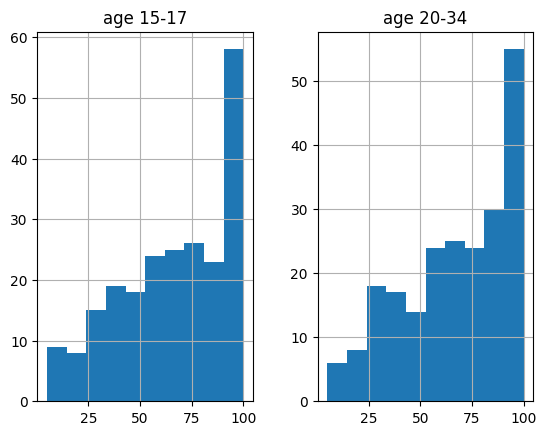

In [46]:
# histogramas 
df[['age 15-17', 'age 20-34']].hist()
plt.show()